# Project Overview: Predicting Loan Defaults

**Summary**  
This project aims to develop a machine learning model to predict whether the customers of a financial institution will default on a loan based on data from their loan application. By accurately identifying potential defaulters, financial institutions can make more informed lending decisions, reduce losses, improve profitability, and increase operational efficiency through the automation of risk assessment.

**Problem**  
Predicting loan defaults is a challenging task due to the multitude of influencing factors such as customers' demographic, financial, location, and behavioral attributes. Traditional default prediction models often oversimplify complex relationships between customer features and default risk. Machine learning offers enhanced predictive capability by capturing non-linear patterns and intricate dependencies in loan application data, enabling more accurate predictions of loan default risk.

**Objectives**  
- Develop a machine learning model to predict loan defaults using customer data from loan applications.
- Compare multiple models (e.g., Logistic Regression, Random Forest, XGBoost) using a suitable evaluation metric (such as AUC-PR).
- Identify key factors influencing loan default risk through feature importance analysis.

**Value Proposition**  
This project enables financial institutions to reduce loan default rates and make better and faster lending decisions by leveraging machine learning for automated and improved risk assessment. 

**Business Goals**  
- Reduce losses by 5M-10M INR within 12 months of model deployment by decreasing the loan default rate by 10%-20%.
- Decrease loan processing time by 25%-40% by automating risk assessment, leading to less time spent on manual evaluations.
- Ensure 100% compliance with regulatory requirements and fair lending practices.

**Data**  
The dataset contains information provided by customers of a financial institution during the loan application process. It is sourced from the "Loan Prediction Based on Customer Behavior" dataset by Subham Jain, available on [Kaggle](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior). The dataset consists of three `.csv` files:
1. `Training Data.csv`: Contains the features, target variable (`Risk Flag`), and `ID` column from the training data. 
2. `Test Data.csv`: Contains the features and `ID` column from the test data.
3. `Sample Prediction Dataset.csv`: Contains the target variable (`Risk Flag`) and `ID` column from the test data. 

Dataset Statistics:
- Training set size: 252,000 records 
- Test set size: 28,000 records 
- Target variable: Risk flag (training: 12.3% defaults, test: 12.8% defaults)
- Features: 11 
  - Demographic: Age, married, profession
  - Financial: Income, house ownership, car ownership
  - Location: City, state
  - Behavioral: Experience, current job years, current house years

Data Overview Table:

| Column | Description | Storage Type | Semantic Type | Theoretical Range | Training Data Range |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Risk Flag | Defaulted on loan (0: No, 1: Yes) | Integer | Categorical (Binary) | [0, 1] | [0, 1] |
| Income | Income of the applicant | Integer | Numerical | [0, ∞] | [10K, 10M] |
| Age | Age of the applicant (in years) | Integer | Numerical | [18, ∞] | [21, 79] |
| Experience | Work experience (in years) | Integer | Numerical | [0, ∞] | [0, 20] |
| Profession | Applicant's profession | String | Categorical (Nominal) | Any profession [e.g., "Architect", "Dentist"] | 51 unique professions |
| Married | Marital status | String | Categorical (Binary) | ["single", "married"] | ["single", "married"] |
| House Ownership | Applicant owns or rents a house | String | Categorical (Nominal) | ["rented", "owned", "norent_noown"] | ["rented", "owned", "norent_noown"] |
| Car Ownership | Whether applicant owns a car | String | Categorical (Binary) | ["yes", "no"] | ["yes", "no"] |
| Current Job Years | Years in the current job | Integer | Numerical | [0, ∞] | [0, 14] |
| Current House Years | Years in the current house | Integer | Numerical | [0, ∞] | [10, 14] |
| City | City of residence | String | Categorical (Nominal) | Any city [e.g., "Mumbai", "Bangalore"] | 317 unique cities |
| State | State of residence | String | Categorical (Nominal) | Any state [e.g., "Maharashtra", "Tamil_Nadu"] | 29 unique states |

Example Training Data:

| Risk Flag | Income    | Age | Experience | Profession         | Married | House Ownership | Car Ownership | Current Job Years | Current House Years | City      | State         |
| :-------- | :-------- | :-- | :--------- | :----------------- | :------ | :-------------- | :------------ | :---------------- | :------------------ | :-------- | :------------ |
| 0         | 1,303,834 | 23  | 3          | Mechanical_engineer | single  | rented          | no            | 3                 | 13                   | Rewa      | Madhya_Pradesh |
| 1         | 6,256,451 | 41  | 2          | Software_Developer | single  | rented          | yes           | 2                 | 12                   | Bangalore | Tamil_Nadu    |
| 0         | 3,991,815 | 66  | 4          | Technical_writer   | married | rented          | no            | 4                 | 10                   | Alappuzha | Kerala        |

**Technical Requirements**  
- Data Preprocessing:
  - Load, clean, transform, and save data using `pandas` and `sklearn`.
  - Handle duplicates, data types, missing values, and outliers.
  - Extract features, scale numerical features, and encode categorical features.
- Exploratory Data Analysis (EDA):
  - Analyze descriptive statistics using `pandas` and `numpy`.
  - Visualize distributions, correlations, and relationships using `seaborn` and `matplotlib`.
- Modeling:
  - Train baseline models and perform hyperparameter tuning for binary classification task with `sklearn` and `xgboost`.
  - Baseline models: Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Random Forest, Multi-Layer Perceptron, XGBoost.
  - Evaluate model performance using Area Under the Precision-Recall Curve (AUC-PR).
    - AUC-PR is more suitable to address class imbalance (12.3% defaults) with a focus on the positive class (preventing defaults) than accuracy, precision, recall, F1-score, and AUC-ROC.
    - Success criterion: Minimum AUC-PR of 0.70 on the test data.
  - Potentially use additional techniques to address class imbalance (e.g., SMOTE, class weights).
  - Visualize feature importance, show model prediction examples, and save the final model with `pickle`.
- Deployment:
  - Expose the final model via a REST API for easy integration with existing loan processing systems.
  - Implement efficient batch processing capabilities to handle up to 10K predictions in under 30 seconds.
  - Deploy using cloud infrastructure to ensure scalability and security.
  - Set up model performance monitoring and data drift detection.
- Stakeholders:
  - Loan officers: Direct users of the model predictions in day-to-day loan approvals.
  - Credit risk analysts: Provide subject matter expertise on loan default risk.
  - Compliance officers: Ensure the model complies with any legal and regulatory guidelines.
  - IT department: Manage the IT infrastructure and ensure data access for the model's development and deployment. 

By fulfilling these objectives and requirements, the project will provide a valuable tool for predicting loan defaults, thereby enhancing decision-making for financial institutions.

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import os

# Data Loading and Inspection
Load data from the three `.csv` files into three Pandas DataFrames.

In [5]:
try:
    df_train = pd.read_csv("data/training_data.csv")
    X_test = pd.read_csv("data/test_data.csv")
    y_test = pd.read_csv("data/sample_prediction_dataset.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: The file content could not be parsed as a CSV.")
except PermissionError:
    print("Error: Permission denied when accessing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Data loaded successfully.


Initial data inspection to understand the structure of the dataset and detect obvious issues.

In [7]:
# Show DataFrame info to check the number of rows and columns, data types and missing values
print("Training Data:")
print(df_train.info())
print("\nTest Data - Features:")
print(X_test.info())
print("\nTest Data - Target Variable:")
print(y_test.info())

Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB
None

Test Data - Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999

In [9]:
# Show top five rows of the training data
print("Training Data:")
df_train.head()

Training Data:


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [11]:
# Show top five rows of the test data features
print("Test Data - Features:")
X_test.head()

Test Data - Features:


,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [13]:
# Show top five rows of the test data target variable
print("Test Data - Target Variable:")
y_test.head()

Test Data - Target Variable:


,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


# Data Preprocessing

## Standardizing Names and Labels

**Column Names**  
Convert all column names to snake_case for consistency, improved readability, and to minimize the risk of errors. This also resolves inconsistencies in column names between the training and test datasets (e.g., "Id" vs. "ID", "Risk_Flag" vs. "risk_flag").  

In [15]:
# Convert column names to snake_case
df_train.columns = (
    df_train.columns
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
    .str.replace(r"[-/\s+]", "_", regex=True)  # Replace spaces and special characters with "_"
    .str.replace("_single", "")  # Shorten "married_single" to "married"
)

X_test.columns = (
    X_test.columns
    .str.strip()  
    .str.lower()  
    .str.replace(r"[-/\s+]", "_", regex=True) 
    .str.replace("_single", "") 
)

y_test.columns = (
    y_test.columns
    .str.strip()  
    .str.lower()  
    .str.replace(r"[-/\s+]", "_", regex=True)  
    .str.replace("_single", "") 
)

**Categorical Labels**  
Convert all categorical labels to snake_case for consistency, improved readability, and to minimize the risk of errors. This also resolves inconsistencies in the state names of the "state" column between the training and test datasets (e.g., "Uttar_Pradesh" vs. "Uttar Pradesh", "Jammu_and_Kashmir" vs. "Jammu and Kashmir"). 

In [17]:
def standardize_categorical_labels(categorical_label):
    return (
        categorical_label
        .strip()  # Remove leading/trailing spaces
        .lower()  # Convert to lowercase
        .replace("-", "_")  # Replace hyphens with "_"
        .replace("/", "_")  # Replace slashes with "_"
        .replace(" ", "_")  # Replace spaces with "_"
    )


# Define categorical columns to standardize labels
columns_to_standardize = ["profession", "city", "state"]

# Apply standardization of categorical labels
for column in columns_to_standardize:
    df_train[column] = df_train[column].apply(standardize_categorical_labels)
    X_test[column] = X_test[column].apply(standardize_categorical_labels)

## Merging Datasets

In [19]:
# Merge X_test and y_test
df_test = pd.merge(X_test, y_test, on="id")

## Handling Duplicates

Identify and remove duplicates based on all columns.

In [21]:
# Identify duplicates based on all columns
print("Training Data:")
print(df_train.duplicated().value_counts())
print("\nTest Data:")
print(df_test.duplicated().value_counts())

Training Data:
False    252000
Name: count, dtype: int64

Test Data:
False    28000
Name: count, dtype: int64


No duplicates were found based on all columns in both the training and test data.

Identify and remove duplicates based on the ID column.

In [23]:
# Identify duplicates based on the ID column
print("Training Data:")
print(df_train.duplicated(subset=["id"]).value_counts())
print("\nTest Data:")
print(df_test.duplicated(subset=["id"]).value_counts())

Training Data:
False    252000
Name: count, dtype: int64

Test Data:
False    28000
Name: count, dtype: int64


No duplicates were found based on the ID column in both the training and test data.

## Handling Data Types

Identify and convert incorrect storage data types.

In [25]:
# Identify storage data types
print("Training Data:")
print(df_train.dtypes)
print("\nTest Data:")
print(df_test.dtypes)

Training Data:
id                    int64
income                int64
age                   int64
experience            int64
married              object
house_ownership      object
car_ownership        object
profession           object
city                 object
state                object
current_job_yrs       int64
current_house_yrs     int64
risk_flag             int64
dtype: object

Test Data:
id                    int64
income                int64
age                   int64
experience            int64
married              object
house_ownership      object
car_ownership        object
profession           object
city                 object
state                object
current_job_yrs       int64
current_house_yrs     int64
risk_flag             int64
dtype: object


No incorrect storage data types were found at first glance.

Identify object columns with two unique categories and convert them to boolean columns.

In [27]:
# Identify object columns with two unique categories 
print("Training Data:")
print(df_train[df_train.select_dtypes(include=["object"]).columns.tolist()].nunique())
print("\nTest Data:")
print(df_test[df_test.select_dtypes(include=["object"]).columns.tolist()].nunique())

Training Data:
married              2
house_ownership      3
car_ownership        2
profession          51
city               317
state               29
dtype: int64

Test Data:
married              2
house_ownership      3
car_ownership        2
profession          51
city               317
state               29
dtype: int64


In [29]:
# Convert married and car_ownership column from object to boolean
df_train["married"] = df_train["married"].map({"married": True, "single": False})
df_test["married"] = df_test["married"].map({"married": True, "single": False})
df_train["car_ownership"] = df_train["car_ownership"].map({"yes": True, "no": False})
df_test["car_ownership"] = df_test["car_ownership"].map({"yes": True, "no": False})

## Train-Validation-Test Split  
The dataset is initially divided into a training set (90%) and a test set (10%). Split the training set further to achieve the following train-validation-test split: 

| Data           | Size (%) | Size (Total) | 
|:---------------|----------|---------|
| Training Set   | 80%      | 224,000 |
| Validation Set | 10%      | 28,000  | 
| Test Set       | 10%      | 28,000  | 

This results in 80% of the total data being used for training, 10% for validation, and 10% for testing, while keeping the original test set size unchanged.

In [31]:
# Split the data into X features and y target
X_train = df_train.drop("risk_flag", axis=1)
y_train = df_train["risk_flag"]
X_test = df_test.drop("risk_flag", axis=1)
y_test = df_test["risk_flag"]

In [33]:
# Split the training set further into training and validation sets (validation set size same as test set size)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=X_test.shape[0]/df_train.shape[0], random_state=42)

## Engineering New Features

In [35]:
# Explore number of unique categories in categorical columns
print("Training Data:")
print(X_train[["house_ownership", "profession", "city", "state"]].nunique())
print("\nValidation Data:")
print(X_val[["house_ownership", "profession", "city", "state"]].nunique())
print("\nTest Data:")
print(X_test[["house_ownership", "profession", "city", "state"]].nunique())

Training Data:
house_ownership      3
profession          51
city               317
state               29
dtype: int64

Validation Data:
house_ownership      3
profession          51
city               317
state               29
dtype: int64

Test Data:
house_ownership      3
profession          51
city               317
state               29
dtype: int64


### Profession-Based Features

**Job Stability**  
Derive job stability from profession.

In [105]:
def derive_job_stability(profession):
    job_stability_map = {
        # Government and highly regulated roles with exceptional job security
        "civil_servant": "very_stable",
        "army_officer": "very_stable",
        "police_officer": "very_stable",
        "magistrate": "very_stable",
        "official": "very_stable",
        "air_traffic_controller": "very_stable",
        "firefighter": "very_stable",
        "librarian": "very_stable",
        
        # Licensed/regulated professionals with strong job security
        "physician": "stable",
        "surgeon": "stable",
        "dentist": "stable",
        "chartered_accountant": "stable",
        "civil_engineer": "stable",
        "mechanical_engineer": "stable",
        "chemical_engineer": "stable",
        "petroleum_engineer": "stable",
        "biomedical_engineer": "stable",
        "engineer": "stable",
        
        # Corporate roles with steady demand
        "software_developer": "moderate",
        "computer_hardware_engineer": "moderate",
        "financial_analyst": "moderate",
        "industrial_engineer": "moderate",
        "statistician": "moderate",
        "microbiologist": "moderate",
        "scientist": "moderate",
        "geologist": "moderate",
        "economist": "moderate",
        "technology_specialist": "moderate",
        "design_engineer": "moderate",
        "architect": "moderate",
        "surveyor": "moderate",
        "secretary": "moderate",
        "flight_attendant": "moderate",
        "hotel_manager": "moderate",
        "computer_operator": "moderate",
        "technician": "moderate",
        
        # Project-based or variable demand roles
        "web_designer": "variable",
        "fashion_designer": "variable",
        "graphic_designer": "variable",
        "designer": "variable",
        "consultant": "variable",
        "technical_writer": "variable",
        "artist": "variable",
        "comedian": "variable",
        "chef": "variable",
        "analyst": "variable",
        "psychologist": "variable",
        "drafter": "variable",
        "aviator": "variable",
        "politician": "variable",
        "lawyer": "variable"
    }

    # Return the job stability score based on the profession (default to "moderate" for unknown categories)
    return job_stability_map.get(profession, "moderate")
    
# Apply function to create job stability feature in training, validation, and test data
X_train["job_stability"] = X_train["profession"].map(derive_job_stability)
X_val["job_stability"] = X_val["profession"].map(derive_job_stability)
X_test["job_stability"] = X_test["profession"].map(derive_job_stability)

### Location-Based Features

**City Tier**  
Derive city tier from city.   
Categorize cities into three tiers that reflect differences in employment opportunities, income levels, cost of living, population densitiy, and economic activity.
- Tier 1: Large metropolitan cities with high population density, significant economic activity, and robust infrastructure. India's most developed and urbanized cities.
- Tier 2: Medium-sized cities with growing industries, regional importance, and moderate economic activity. Less urbanized than Tier 1.
- Tier 3: Smaller cities or towns with limited industrial and economic activity, often rural or semi-urban areas.

In [113]:
def derive_city_tier(city):
    tier_map = {
        # Tier 1 cities
        "new_delhi": "tier_1",
        "navi_mumbai": "tier_1",
        "kolkata": "tier_1",
        "bangalore": "tier_1",
        "chennai": "tier_1",
        "hyderabad": "tier_1",
        "mumbai": "tier_1",
        "pune": "tier_1",
        "ahmedabad": "tier_1",
        "jaipur": "tier_1",
        "lucknow": "tier_1",
        "noida": "tier_1",
        "coimbatore": "tier_1",
        "surat": "tier_1",
        "nagpur": "tier_1",
        "kochi": "tier_1",
        "thiruvananthapuram": "tier_1",
        "kanpur": "tier_1",
        "patna": "tier_1",
        
        # Tier 2 cities
        "bhopal": "tier_2",
        "vijayawada": "tier_2",
        "indore": "tier_2",
        "jodhpur": "tier_2",
        "vadodara": "tier_2",
        "ludhiana": "tier_2",
        "madurai": "tier_2",
        "agra": "tier_2",
        "mysore[7][8][9]": "tier_2",
        "rajkot": "tier_2",
        "nashik": "tier_2",
        "amritsar": "tier_2",
        "ranchi": "tier_2",
        "chandigarh_city": "tier_2",
        "allahabad": "tier_2",
        "bhubaneswar": "tier_2",
        "varanasi": "tier_2",
        "jabalpur": "tier_2",
        "guwahati": "tier_2",
        "tiruppur": "tier_2",
        "raipur": "tier_2",
        "udaipur": "tier_2",
        "gwalior": "tier_2",
        
        # Tier 3 cities
        "vijayanagaram": "tier_3",
        "bulandshahr": "tier_3",
        "saharsa[29]": "tier_3",
        "hajipur[31]": "tier_3",
        "satara": "tier_3",
        "ongole": "tier_3",
        "bellary": "tier_3",
        "giridih": "tier_3",
        "hospet": "tier_3",
        "khammam": "tier_3",
        "danapur": "tier_3",
        "bareilly": "tier_3",
        "satna": "tier_3",
        "howrah": "tier_3",
        "thanjavur": "tier_3",
        "farrukhabad": "tier_3",
        "buxar[37]": "tier_3",
        "arrah": "tier_3",
        "thrissur": "tier_3",
        "proddatur": "tier_3",
        "bahraich": "tier_3",
        "nandyal": "tier_3",
        "siwan[32]": "tier_3",
        "barasat": "tier_3",
        "dhule": "tier_3",
        "begusarai": "tier_3",
        "khandwa": "tier_3",
        "guntakal": "tier_3",
        "latur": "tier_3",
        "karaikudi": "tier_3"
    }
    
    # Return city tier based on the city (default to "unknown" for unknown categories)
    return tier_map.get(city, "unknown")

# Apply function to create city tier feature in training, validation, and test data
X_train["city_tier"] = X_train["city"].map(derive_city_tier)
X_val["city_tier"] = X_val["city"].map(derive_city_tier)
X_test["city_tier"] = X_test["city"].map(derive_city_tier)

**State Default Rate**  
Derive state default rate from state using target encoding.

In [41]:
# Merge X_train and y_train
df_train = pd.concat([X_train, y_train], axis=1)

# Calculate default rate by state based on the training data
default_rate_by_state = df_train.groupby("state")["risk_flag"].mean()

# Create state default rate feature in training, validation, and test data by replacing the state with its corresponding default rate
X_train["state_default_rate"] = X_train["state"].map(default_rate_by_state)
X_val["state_default_rate"] = X_val["state"].map(default_rate_by_state)
X_test["state_default_rate"] = X_test["state"].map(default_rate_by_state)

## Defining Semantic Type  
Define semantic column types (numerical, categorical, boolean) for downstream tasks like additional preprocessing steps, exploratory data analysis, and machine learning.

In [43]:
# Define semantic column types manually
numerical_columns = ["income", "age", "experience", "current_job_yrs", "current_house_yrs", "state_default_rate"]
categorical_columns = ["house_ownership", "job_stability", "city_tier", "profession", "city", "state"]
boolean_columns = ["risk_flag", "married", "car_ownership"]

## Handling Missing Values

In [117]:
# Identify missing values
print("Training Data - Features:")
print(X_train.isnull().sum())
print("\nTraining Data - Target Variable:")
print(y_train.isnull().sum())

print("\nValidation Data - Features:")
print(X_val.isnull().sum())
print("\nValidation Data - Target Variable:")
print(y_val.isnull().sum())

print("\nTest Data - Features:")
print(X_test.isnull().sum())
print("\nTest Data - Target Variable:")
print(y_test.isnull().sum())

Training Data - Features:
id                    0
income                0
age                   0
experience            0
married               0
house_ownership       0
car_ownership         0
profession            0
city                  0
state                 0
current_job_yrs       0
current_house_yrs     0
job_stability         0
city_tier             0
state_default_rate    0
outlier               0
outlier_score         0
dtype: int64

Training Data - Target Variable:
0

Validation Data - Features:
id                    0
income                0
age                   0
experience            0
married               0
house_ownership       0
car_ownership         0
profession            0
city                  0
state                 0
current_job_yrs       0
current_house_yrs     0
job_stability         0
city_tier             0
state_default_rate    0
outlier               0
outlier_score         0
dtype: int64

Validation Data - Target Variable:
0

Test Data - Features:
id    

No missing values were found in any of the columns in the training, validation, and test data.

## Handling Outliers

### 3SD Method  
Identify and remove univariate outliers in numerical columns by applying the 3 standard deviation (SD) rule. Specifically, a data point is considered an outlier if it falls more than 3 standard deviations above or below the mean of the column. 

In [47]:
# Create a custom transformer class to identify and remove outliers using the 3SD method
class OutlierRemover3SD(BaseEstimator, TransformerMixin):
    def fit(self, df, numerical_columns):
        # Convert single column string to list
        if isinstance(numerical_columns, str):
            self.numerical_columns_ = [numerical_columns]
        else:
            self.numerical_columns_ = numerical_columns
            
        # Calculate statistics (mean, standard deviation, cutoff values) for each column
        self.stats_ = pd.DataFrame(index=self.numerical_columns_)
        self.stats_["mean"] = df[self.numerical_columns_].mean()
        self.stats_["sd"] = df[self.numerical_columns_].std()
        self.stats_["lower_cutoff"] = self.stats_["mean"] - 3 * self.stats_["sd"]
        self.stats_["upper_cutoff"] = self.stats_["mean"] + 3 * self.stats_["sd"]
        
        # Create masks for filtering outliers 
        self.masks_ = (df[self.numerical_columns_] >= self.stats_["lower_cutoff"]) & (df[self.numerical_columns_] <= self.stats_["upper_cutoff"])  # masks by column
        self.final_mask_ = self.masks_.all(axis=1)  # single mask across all columns
     
        # Calculate number of outliers
        self.stats_["outliers"] = (~self.masks_).sum()  # by column
        self.outliers_ = (~self.final_mask_).sum()  # across all columns
        
        # Show outliers across all columns
        if len(self.numerical_columns_) == 1:
            print(f"\nIdentified {self.outliers_} rows ({self.outliers_ / len(self.final_mask_) * 100:.1f}%) with outliers in the '{self.numerical_columns_[0]}' column.")
        else:
            print(f"\nIdentified {self.outliers_} rows ({self.outliers_ / len(self.final_mask_) * 100:.1f}%) with outliers in one or more numerical columns.")
 
        return self

    def transform(self, df):
        # Create masks for new df
        masks = (df[self.numerical_columns_] >= self.stats_["lower_cutoff"]) & (df[self.numerical_columns_] <= self.stats_["upper_cutoff"])  # masks by column
        final_mask = masks.all(axis=1)  # single mask across all columns
        
        # Remove outliers based on the final mask
        print(f"Removed {(~final_mask).sum()} rows ({(~final_mask).sum() / len(final_mask) * 100:.1f}%) with outliers.")
        return df[final_mask]

    def fit_transform(self, df, numerical_columns):
        # Perform both fit and transform 
        return self.fit(df, numerical_columns).transform(df)


# Initialize outlier remover 
outlier_remover_3sd = OutlierRemover3SD()

# Fit outlier remover to training data
outlier_remover_3sd.fit(X_train, numerical_columns)

# Show mean, sd, cutoff values, and outliers by column for training data
print("\nOutliers by column:")
round(outlier_remover_3sd.stats_, 2)


Identified 1289 rows (0.6%) with outliers in one or more numerical columns.

Outliers by column:


,mean,sd,lower_cutoff,upper_cutoff,outliers
income,4998647.56,2879180.48,-3638893.89,13636189.00,0
age,49.98,17.07,-1.24,101.21,0
experience,10.08,6.00,-7.92,28.08,0
current_job_yrs,6.33,3.65,-4.61,17.27,0
current_house_yrs,12.00,1.40,7.80,16.19,0
state_default_rate,0.12,0.02,0.07,0.18,1289


In [49]:
# Remove outliers
print("Training Data:")
X_train_no_outliers = outlier_remover_3sd.transform(X_train)
print("\nValidation Data:")
X_val_no_outliers = outlier_remover_3sd.transform(X_val)
print("\nTest Data:")
X_test_no_outliers = outlier_remover_3sd.transform(X_test)

Training Data:
Removed 1289 rows (0.6%) with outliers.

Validation Data:
Removed 168 rows (0.6%) with outliers.

Test Data:
Removed 173 rows (0.6%) with outliers.


### 1.5 IQR Method  
Identify and remove univariate outliers in numerical columns using the 1.5 interquartile range (IQR) rule. Specifically, a data point is considered an outlier if it falls more than 1.5 interquartile ranges above the third quartile (Q3) or below the first quartile (Q1) of the column.   

In [51]:
# Create a custom transformer class to identify and remove outliers using the 1.5 IQR method
class OutlierRemoverIQR(BaseEstimator, TransformerMixin):
    def fit(self, df, numerical_columns):
        # Convert single column string to list
        if isinstance(numerical_columns, str):
            self.numerical_columns_ = [numerical_columns]
        else:
            self.numerical_columns_ = numerical_columns
        
        # Calculate statistics (first quartile, third quartile, interquartile range, cutoff values) for each column
        self.stats_ = pd.DataFrame(index=self.numerical_columns_)
        self.stats_["Q1"] = df[self.numerical_columns_].quantile(0.25)
        self.stats_["Q3"] = df[self.numerical_columns_].quantile(0.75)
        self.stats_["IQR"] = self.stats_["Q3"] - self.stats_["Q1"]
        self.stats_["lower_cutoff"] = self.stats_["Q1"] - 1.5 * self.stats_["IQR"]
        self.stats_["upper_cutoff"] = self.stats_["Q3"] + 1.5 * self.stats_["IQR"]

        # Create masks for filtering outliers 
        self.masks_ = (df[self.numerical_columns_] >= self.stats_["lower_cutoff"]) & (df[self.numerical_columns_] <= self.stats_["upper_cutoff"])  # masks by column
        self.final_mask_ = self.masks_.all(axis=1)  # single mask across all columns

        # Calculate number of outliers
        self.stats_["outliers"] = (~self.masks_).sum()  # by column
        self.outliers_ = (~self.final_mask_).sum()  # across all columns
        
        # Show outliers across all columns
        if len(self.numerical_columns_) == 1:
            print(f"\nIdentified {self.outliers_} rows ({self.outliers_ / len(self.final_mask_) * 100:.1f}%) with outliers in the '{numerical_columns[0]}' column.")
        else:
            print(f"\nIdentified {self.outliers_} rows ({self.outliers_ / len(self.final_mask_) * 100:.1f}%) with outliers in one or more numerical columns.")
            
        return self

    def transform(self, df):
        # Create masks for new df
        masks = (df[self.numerical_columns_] >= self.stats_["lower_cutoff"]) & (df[self.numerical_columns_] <= self.stats_["upper_cutoff"])  # masks by column
        final_mask = masks.all(axis=1)  # single mask across all columns
        
        # Remove outliers based on the final mask
        print(f"Removed {(~final_mask).sum()} rows ({(~final_mask).sum() / len(final_mask) * 100:.1f}%) with outliers.")
        return df[final_mask]

    def fit_transform(self, df, numerical_columns):
        # Perform both fit and transform
        return self.fit(df, numerical_columns).transform(df)


# Initialize outlier remover 
outlier_remover_iqr = OutlierRemoverIQR()

# Fit outlier remover to training data
outlier_remover_iqr.fit(X_train, numerical_columns)

# Show outliers by column for training data
print("\nOutliers by column:")
round(outlier_remover_iqr.stats_, 2)


Identified 8847 rows (3.9%) with outliers in one or more numerical columns.

Outliers by column:


,Q1,Q3,IQR,lower_cutoff,upper_cutoff,outliers
income,2499276.00,7479878.00,4980602.00,-4971627.00,14950781.00,0
age,35.00,65.00,30.00,-10.00,110.00,0
experience,5.00,15.00,10.00,-10.00,30.00,0
current_job_yrs,3.00,9.00,6.00,-6.00,18.00,0
current_house_yrs,11.00,13.00,2.00,8.00,16.00,0
state_default_rate,0.11,0.13,0.02,0.09,0.16,8847


In [53]:
# Show default rate by state
default_rate_by_state.sort_values()

state
sikkim               0.049724
uttarakhand          0.072340
punjab               0.090822
chandigarh           0.092362
karnataka            0.100529
tamil_nadu           0.102426
delhi                0.103314
maharashtra          0.112525
mizoram              0.113032
andhra_pradesh       0.114901
puducherry           0.116261
uttar_pradesh        0.117907
gujarat              0.119882
haryana              0.123600
west_bengal          0.129029
himachal_pradesh     0.129555
telangana            0.130221
bihar                0.130464
jharkhand            0.131898
assam                0.132235
chhattisgarh         0.132943
uttar_pradesh[5]     0.133929
odisha               0.138107
rajasthan            0.140211
madhya_pradesh       0.155923
jammu_and_kashmir    0.157261
kerala               0.165222
tripura              0.168056
manipur              0.214477
Name: risk_flag, dtype: float64

In [55]:
# Remove outliers
print("Training Data:")
X_train_no_outliers = outlier_remover_iqr.transform(X_train)
print("\nValidation Data:")
X_val_no_outliers = outlier_remover_iqr.transform(X_val)
print("\nTest Data:")
X_test_no_outliers = outlier_remover_iqr.transform(X_test)

Training Data:
Removed 8847 rows (3.9%) with outliers.

Validation Data:
Removed 1098 rows (3.9%) with outliers.

Test Data:
Removed 1028 rows (3.7%) with outliers.


### Isolation Forest
Identify and remove multivariate outliers using the isolation forest algorithm.

In [60]:
# Initialize isolation forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Create list of numerical and boolean features (without the target variable "risk_flag")
numerical_boolean_features = numerical_columns + ["married", "car_ownership"]

# Fit isolation forest on training data
isolation_forest.fit(X_train[numerical_boolean_features])

# Predict outliers on training, validation, and test data
X_train["outlier"] = isolation_forest.predict(X_train[numerical_boolean_features])
X_train["outlier_score"] = isolation_forest.decision_function(X_train[numerical_boolean_features])
X_val["outlier"] = isolation_forest.predict(X_val[numerical_boolean_features])
X_val["outlier_score"] = isolation_forest.decision_function(X_val[numerical_boolean_features])
X_test["outlier"] = isolation_forest.predict(X_test[numerical_boolean_features])
X_test["outlier_score"] = isolation_forest.decision_function(X_test[numerical_boolean_features])

# Show number of outliers
n_outliers_train = X_train["outlier"].value_counts()[-1]
contamination_train = X_train["outlier"].value_counts()[-1] / X_train["outlier"].value_counts().sum()
print(f"Training Data: Identified {n_outliers_train} rows ({100 * contamination_train:.1f}%) as multivariate outliers.")

n_outliers_val = X_val["outlier"].value_counts()[-1]
contamination_val = X_val["outlier"].value_counts()[-1] / X_val["outlier"].value_counts().sum()
print(f"Validation Data: Identified {n_outliers_val} rows ({100 * contamination_val:.1f}%) as multivariate outliers.")

n_outliers_test = X_test["outlier"].value_counts()[-1]
contamination_test = X_test["outlier"].value_counts()[-1] / X_test["outlier"].value_counts().sum()
print(f"Test Data: Identified {n_outliers_test} rows ({100 * contamination_test:.1f}%) as multivariate outliers.")

Training Data: Identified 11178 rows (5.0%) as multivariate outliers.
Validation Data: Identified 1361 rows (4.9%) as multivariate outliers.
Test Data: Identified 1329 rows (4.7%) as multivariate outliers.


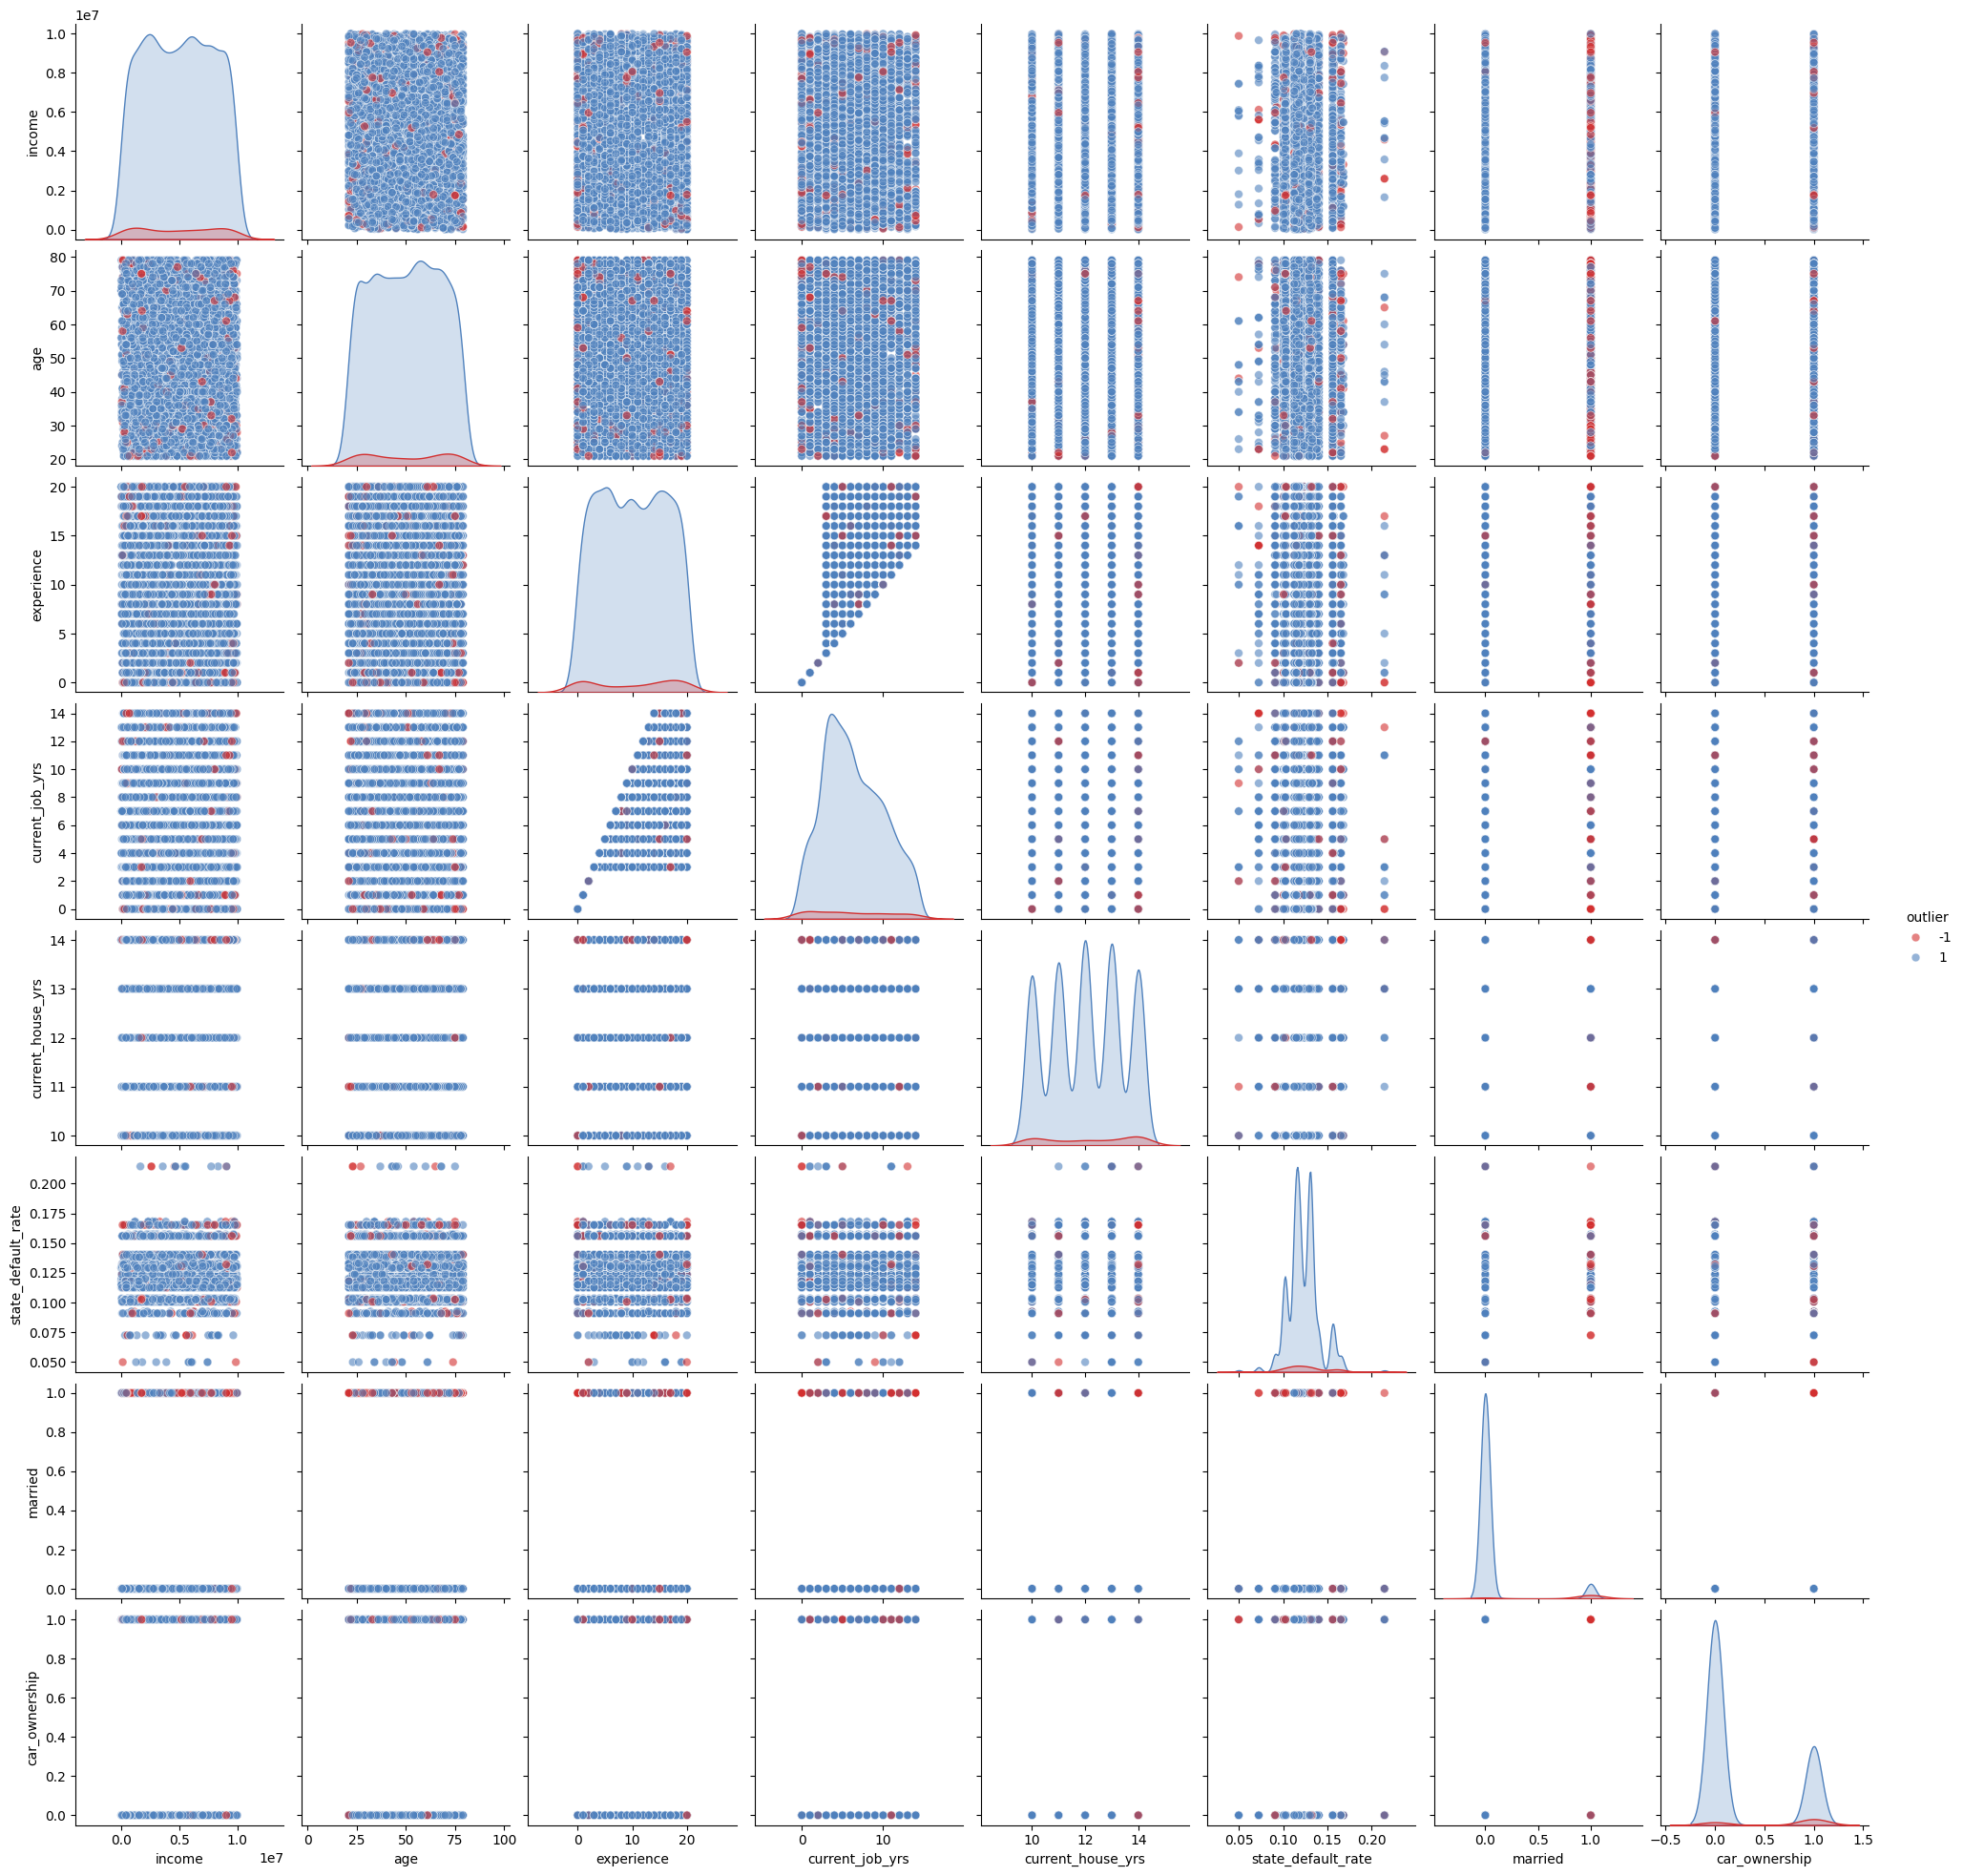

In [62]:
# Scatter plot matrix to visualize outliers for a subsample of the training data
X_train_subsample = X_train[numerical_boolean_features + ["outlier"]].sample(n=5000, random_state=42)
sns.pairplot(X_train_subsample, hue="outlier", palette={1: "#4F81BD", -1: "#D32F2F"}, plot_kws={"alpha":0.6, "s":40})

In [64]:
# Remove outliers
X_train_no_outliers = X_train[X_train["outlier"] == 1]
print(f"Training Data: Removed {X_train[X_train['outlier'] == -1].shape[0]} rows ({X_train[X_train['outlier'] == -1].shape[0] / X_train.shape[0] * 100:.1f}%) with multivariate outliers.") 
X_val_no_outliers = X_val[X_val["outlier"] == 1]
print(f"Validation Data: Removed {X_val[X_val['outlier'] == -1].shape[0]} rows ({X_val[X_val['outlier'] == -1].shape[0] / X_val.shape[0] * 100:.1f}%) with multivariate outliers.") 
X_test_no_outliers = df_test[X_test["outlier"] == 1]
print(f"Test Data: Removed {X_test[X_test['outlier'] == -1].shape[0]} rows ({X_test[X_test['outlier'] == -1].shape[0] / X_test.shape[0] * 100:.1f}%) with multivariate outliers.") 

Training Data: Removed 11178 rows (5.0%) with multivariate outliers.
Validation Data: Removed 1361 rows (4.9%) with multivariate outliers.
Test Data: Removed 1329 rows (4.7%) with multivariate outliers.


## Feature Scaling and Encoding  
Use a `ColumnTransformer` to preprocess columns based on their semantic type. This allows the appropriate transformation to each semantic column type in a single step.  
- Scale numerical columns: `StandardScaler` to transform numerical columns to have mean = 0 and standard deviation = 1.
- Encode categorical columns:
    - Nominal columns (unordered categories): `OneHotEncoder` to convert string categories into binary (one-hot) encoded columns.
    - Ordinal columns (ordered categories): `OrdinalEncoder` to convert string categories into integers.
- Retain boolean columns: Pass through boolean columns unchanged using `remainder="passthrough"`.

In [119]:
# Define nominal and ordinal columns
nominal_columns = ["house_ownership"]
ordinal_columns = ["job_stability", "city_tier"]

# Define the explicit order of categories for all ordinal columns
ordinal_column_orders = [
    ["variable", "moderate", "stable", "very_stable"],  # Order for job_stability
    ["unknown", "tier_3", "tier_2", "tier_1"]  # Order for city_tier
]

# Initialize a column transformer 
column_transformer = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numerical_columns), 
        ("nominal_encoder", OneHotEncoder(drop="first"), nominal_columns),
        ("ordinal_encoder", OrdinalEncoder(categories=ordinal_column_orders), ordinal_columns)  
    ],
    remainder="passthrough" 
)

# Fit column transformer on the training data 
column_transformer.fit(X_train)

# Apply feature scaling and encoding to training, validation and test data
X_train_transformed = column_transformer.transform(X_train)
X_val_transformed = column_transformer.transform(X_val)
X_test_transformed = column_transformer.transform(X_test)

# Get transformed column names
nominal_encoded_columns = list(column_transformer.named_transformers_["nominal_encoder"].get_feature_names_out())
passthrough_columns = list(X_train.columns.difference(numerical_columns + nominal_columns + ordinal_columns, sort=False))
transformed_columns = numerical_columns + nominal_encoded_columns + ordinal_columns + passthrough_columns

# Convert transformed data from arrays to DataFrames with column names 
X_train_transformed = pd.DataFrame(X_train_transformed, columns=transformed_columns)
X_val_transformed = pd.DataFrame(X_val_transformed, columns=transformed_columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformed_columns)

# Reset the index to match the untransformed DataFrames
X_train_transformed.index = X_train_transformed["id"] - 1
X_val_transformed.index = X_val_transformed["id"] - 1
X_test_transformed.index = X_test_transformed["id"] - 1

## Saving Data
Save preprocessed data from a Pandas DataFrame to a `.csv` file in the `data` directory.

In [121]:
# Create data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Merge transformed X features and y target variable
df_train_transformed = pd.concat([X_train_transformed, y_train], axis=1)
df_val_transformed = pd.concat([X_val_transformed, y_val], axis=1)
df_test_transformed = pd.concat([X_test_transformed, y_test], axis=1)

# Save as .csv  
df_train_transformed.to_csv("data/training_data_preprocessed.csv", index=False)
df_val_transformed.to_csv("data/validation_data_preprocessed.csv", index=False)
df_test_transformed.to_csv("data/test_data_preprocessed.csv", index=False)

# Exploratory Data Analysis (EDA)

## Univariate EDA  
Analyze the distribution of a single column using descriptive statistics and visualizations.

### Numerical Columns  
Examine descriptive statistics (e.g., mean, median, standard deviation, quartiles) and visualize the distributions (e.g., histogram) of numerical columns.

**Descriptive Statistics**

In [131]:
# Table of descriptive statistics
pd.set_option("display.float_format", "{:,.2f}".format)
X_train[numerical_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
income,"224,000.00","4,998,647.56","2,879,180.48","10,310.00","2,499,276.00","5,003,285.00","7,479,878.00","9,999,938.00"
age,"224,000.00",49.98,17.07,21.00,35.00,50.00,65.00,79.00
experience,"224,000.00",10.08,6.00,0.00,5.00,10.00,15.00,20.00
current_job_yrs,"224,000.00",6.33,3.65,0.00,3.00,6.00,9.00,14.00
current_house_yrs,"224,000.00",12.00,1.40,10.00,11.00,12.00,13.00,14.00
state_default_rate,"224,000.00",0.12,0.02,0.05,0.11,0.12,0.13,0.21


**Visualize Distributions**  
Histogram matrix to show the distribution of all 6 numerical columns in a 2x3 matrix.

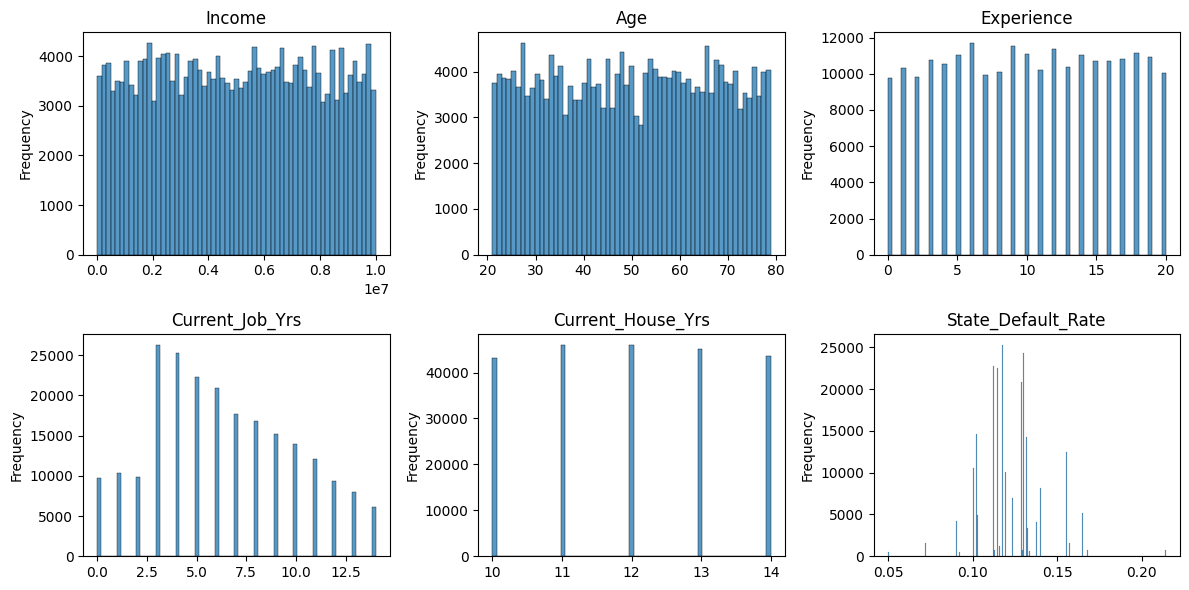

In [154]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the numerical columns
for i, column in enumerate(numerical_columns):
    # Create a subplot in a 2x3 grid (current subplot i+1 because subplot indices start at 1)
    plt.subplot(2, 3, i + 1)
    
    # Create histogram for the current column
    sns.histplot(X_train[column])
    
    # Add title and axes labels
    plt.title(column.title())
    plt.ylabel("Frequency")
    plt.xlabel("")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Customize the histograms of selected columns for better interpretability.

**Income**: Format the x-axis tick values in millions (M).

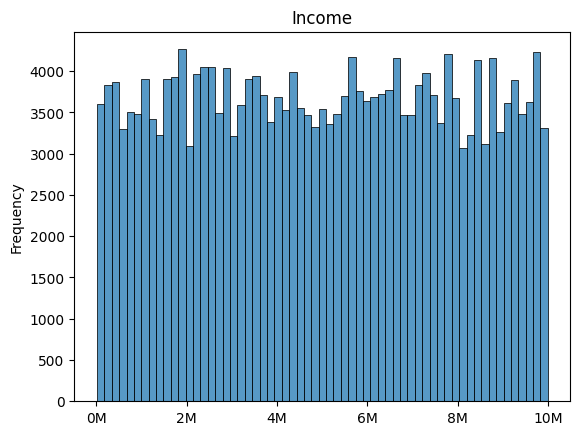

In [173]:
# Imports
from matplotlib.ticker import FuncFormatter

# Histogram 
sns.histplot(X_train["income"])

# Add title and axes labels 
plt.title("Income")
plt.ylabel("Frequency")
plt.xlabel("")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x / 1000000:.0f}M"))   # Format the x-axis tick values in millions

# Show the plot
plt.show()

**Current Job Years**: Set x-axis tick values from 0 to 14 in steps of 1.

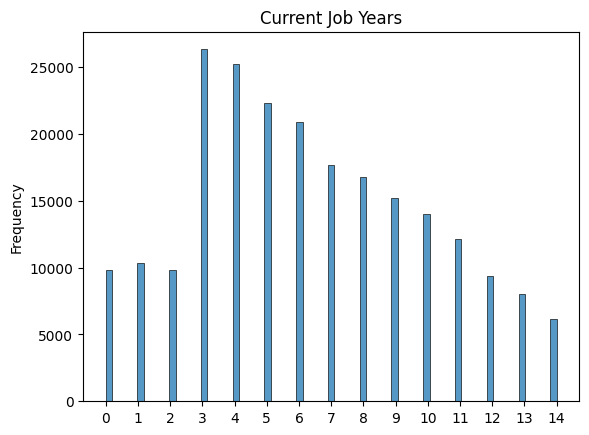

In [189]:
# Histogram 
sns.histplot(X_train["current_job_yrs"])

# Add title and axes labels 
plt.title("Current Job Years")
plt.ylabel("Frequency")
plt.xlabel("")
plt.xticks(np.arange(0, 15, 1))  # Set x-axis tick values from 0 to 14 in steps of 1

# Show the plot
plt.show()

**State Default Rate**: Format the x-axis tick values in %.

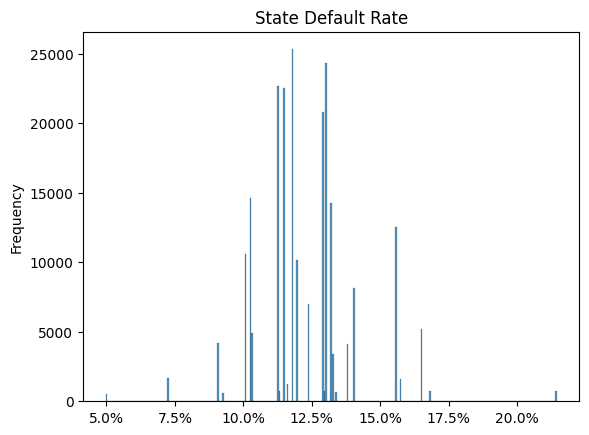

In [181]:
# Histogram 
sns.histplot(X_train["state_default_rate"])

# Add title and axes labels 
plt.title("State Default Rate")
plt.ylabel("Frequency")
plt.xlabel("")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x * 100:.1f}%"))   # Format the x-axis tick values in %

# Show the plot
plt.show()

### Categorical Columns  
Examine descriptive statistics (e.g., absolute and relative frequencies) and visualize the distributions (e.g., bar plot) of categorical columns.

In [ ]:
categorical_columns + boolean_columns

**Risk Flag**

In [ ]:
# Calculate absolute and relative frequencies 
absolute_frequencies = df_train["risk_flag"].value_counts()
relative_frequencies = df_train["risk_flag"].value_counts(normalize=True) * 100  # in percent

# Show frequencies
pd.concat([absolute_frequencies, relative_frequencies], axis=1, keys=["absolute_frequency", "relative_frequency"]).reset_index()

**Married**

In [ ]:
# Calculate absolute and relative frequencies 
absolute_frequencies = df_train["married"].value_counts()
relative_frequencies = df_train["married"].value_counts(normalize=True) * 100  # in percent

# Show frequencies
pd.concat([absolute_frequencies, relative_frequencies], axis=1, keys=["absolute_frequency", "relative_frequency"]).reset_index()

**House Ownership**

In [ ]:
# Calculate absolute and relative frequencies 
absolute_frequencies = df_train["house_ownership"].value_counts()
relative_frequencies = df_train["house_ownership"].value_counts(normalize=True) * 100  # in percent

# Show frequencies
pd.concat([absolute_frequencies, relative_frequencies], axis=1, keys=["absolute_frequency", "relative_frequency"]).reset_index()

**Car Ownership**

In [ ]:
# Calculate absolute and relative frequencies 
absolute_frequencies = df_train["car_ownership"].value_counts()
relative_frequencies = df_train["car_ownership"].value_counts(normalize=True) * 100  # in percent

# Show frequencies
pd.concat([absolute_frequencies, relative_frequencies], axis=1, keys=["absolute_frequency", "relative_frequency"]).reset_index()

**Profession**

In [ ]:
# Calculate absolute and relative frequencies 
absolute_frequencies = df_train["profession"].value_counts()
relative_frequencies = df_train["profession"].value_counts(normalize=True) * 100  # in percent

# Show frequencies
pd.concat([absolute_frequencies, relative_frequencies], axis=1, keys=["absolute_frequency", "relative_frequency"]).reset_index()

**Job Stability**

In [ ]:
# Calculate absolute and relative frequencies 
absolute_frequencies = df_train["job_stability"].value_counts()
relative_frequencies = df_train["job_stability"].value_counts(normalize=True) * 100  # in percent

# Show frequencies
pd.concat([absolute_frequencies, relative_frequencies], axis=1, keys=["absolute_frequency", "relative_frequency"]).reset_index().head(50)

**City**

In [ ]:
# Calculate absolute and relative frequencies 
absolute_frequencies = df_train["city"].value_counts()
relative_frequencies = df_train["city"].value_counts(normalize=True) * 100  # in percent

# Show frequencies
pd.concat([absolute_frequencies, relative_frequencies], axis=1, keys=["absolute_frequency", "relative_frequency"]).reset_index().head(50)

**City Tier**

In [ ]:
# Calculate absolute and relative frequencies 
absolute_frequencies = df_train["city_tier"].value_counts()
relative_frequencies = df_train["city_tier"].value_counts(normalize=True) * 100  # in percent

# Show frequencies
pd.concat([absolute_frequencies, relative_frequencies], axis=1, keys=["absolute_frequency", "relative_frequency"]).reset_index()

**State**

In [ ]:
# Calculate absolute and relative frequencies 
absolute_frequencies = df_train["state"].value_counts()
relative_frequencies = df_train["state"].value_counts(normalize=True) * 100  # in percent

# Show frequencies
pd.concat([absolute_frequencies, relative_frequencies], axis=1, keys=["absolute_frequency", "relative_frequency"]).reset_index()

**Visualize Distributions**  
Bar plot matrix to show the frequency distribution for all 9 categorical and boolean columns in a 3x3 matrix.

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 12))

# Iterate over the categorical and boolean columns
for i, column in enumerate(boolean_columns + categorical_columns):
    # Create a subplot in a 3x3 grid (current subplot i+1 because subplot indices start at 1)
    plt.subplot(3, 3, i + 1)
    
    # Calculate frequencies for the current column
    frequencies = df_train[column].value_counts(normalize=True)  # For absolute frequencies: normalize=False
    
    # Create bar plot for the current column
    sns.barplot(x=frequencies.index, y=frequencies.values, estimator=np.median, errorbar=None)
    
    # Add title and axes labels
    plt.title(column.title())
    plt.ylabel("Frequency")
    plt.xlabel("")

    # Rotate x-axis tick labels by 45 degrees
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Future Improvements

**Data Enrichment**:  
To enhance the model's performance and business value, data enrichment with the following financial features is recommended:
- Loan amount 
- Loan duration
- Interest rate
- Type of loan (e.g., personal, home, vehicle)
- Existing debt
- Credit score

**Enhanced Analysis Capabilities**:  
The addition of these features, particularly loan amount, would enable more precise risk assessment and better alignment with business objectives through cost-sensitive evaluation metrics incorporating actual monetary values. Cost-sensitive metrics or expected monetary value incorporate the actual cost of defaults (false negatives) and the opportunity cost of rejecting good loans (false positives).